# Importing necessary Libaries and Loading dataset

In [14]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [15]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/uber-fares-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'uber-fares-dataset' dataset.
Path to dataset files: /kaggle/input/uber-fares-dataset


In [16]:
import os

file_list = os.listdir(path)


csv_file_path = os.path.join(path, file_list[0])

df = pd.read_csv(csv_file_path)
display(df.head())

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [18]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


# Data Preprocessing

In [19]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [20]:
df.drop(['key'], axis=1, inplace=True)

In [21]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [22]:
df.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [23]:
df.dropna(inplace=True)

In [24]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [25]:
df.head(2)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1


# Exploratory Data Analysis(EDA)

In [26]:
import seaborn as sns

<Axes: xlabel='fare_amount', ylabel='Density'>

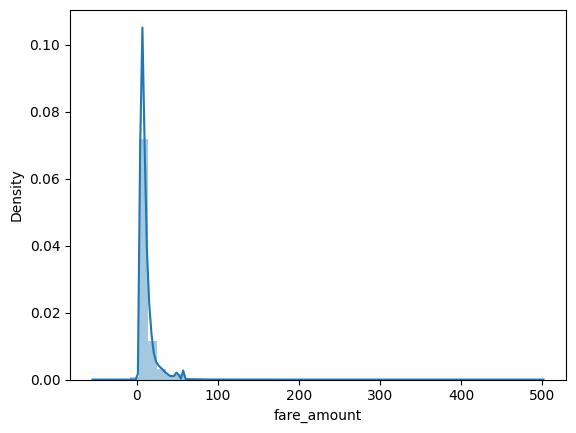

In [27]:
sns.distplot(df['fare_amount'])

In [28]:
import plotly.express as ply

In [29]:
import plotly.express as px

fig = px.bar(df['passenger_count'].value_counts().reindex(),
             y ='count',
             labels ={'index' : 'Passenger Count' , 'count' :'Frequency'},
             title = 'Passenger Count Frequency')
fig.show()

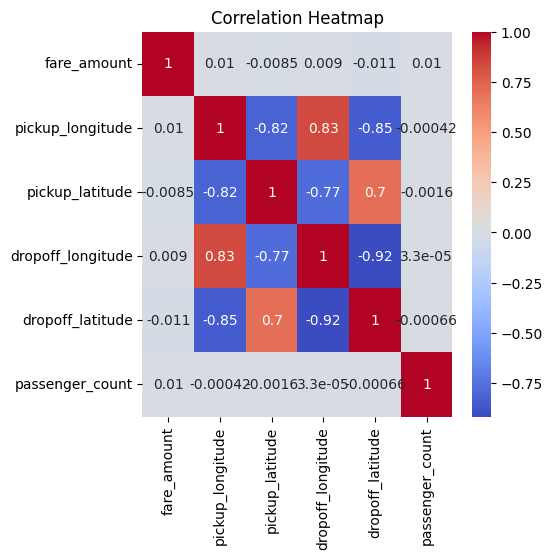

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.heatmap(df.drop('pickup_datetime', axis=1).corr(), annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [31]:
y = df['fare_amount']
X = df.drop('fare_amount', axis=1)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [33]:
X_train.head(2)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
21743,2012-02-15 19:17:00+00:00,-73.995638,40.728353,-73.999792,40.734570,5
124554,2013-10-11 02:31:00+00:00,-73.958847,40.712110,-73.982250,40.723785,5


In [34]:
X_test.head(2)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
134253,2010-02-17 01:53:16+00:00,-74.001323,40.751616,-73.987327,40.736004,1
124141,2012-06-17 15:31:28+00:00,-73.981624,40.780713,-73.990445,40.775239,1


# Linear Regression

In [35]:
X_train.drop(['pickup_datetime'],inplace=True,axis=1)
X_test.drop(['pickup_datetime'],inplace=True,axis=1)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

In [39]:
accuracy = r2_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0002741398425206709


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 10.118882409501472


# Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
y_predf = forest.predict(X_test)

In [43]:
rms = np.sqrt(mean_squared_error(y_test, y_predf))
print("RMSE:", rms)

RMSE: 5.399966771084085


**Conclusion :** The provided data is nonlinear so the Random Forest Classifier works more effeciently than linear regressor model